Dataset Loaded:
Mission data in columns: [0, 287, 287, 1170, 287, 420, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 1146, 1146, 1146, 1289, 1146, 1146, 1146, 1229, 0, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 0, 338, 0, 307, 0, 0, 0, 89, 776, 0, 0, 0, 865, 1111, 0, 722, 0, 0, 0, 0, 3, 0, 593, 0, 582, 0, 0]
 0.82% Missing -> (3/float64) Is your primary role within your company related to tech/IT?
 0.29% Missing -> (5/object) Do you know the options for mental health care available under your employer-provided coverage?
 0.80% Missing -> (16/float64) Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?
 0.80% Missing -> (17/object) Do you know local or online resources to seek help for a mental health disorder?
 0.80% Missing -> (18/object) If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
 0.90% Missing -> (19/object) If you have r

Yes      348
No       340
Maybe    195
Name: Do you currently have a mental health disorder?, dtype: int64
  Statistic  Whole Population      No MHC         MHC   MHC Maybe  \
0     count        883.000000  340.000000  348.000000  195.000000   
1      mean         32.874292   32.723529   32.959770   32.984615   
2       std          7.541499    7.410033    8.090881    6.743058   
3       min         19.000000   19.000000   21.000000   20.000000   
4       25%         28.000000   27.000000   28.000000   28.000000   
5       50%         32.000000   32.000000   31.000000   32.000000   
6       75%         37.000000   37.000000   37.000000   37.000000   
7       max         99.000000   63.000000   99.000000   61.000000   

   Anxiety & Depression       ADHD       PTSD        OCD  
0            149.000000  73.000000  37.000000  31.000000  
1             32.194631  33.917808  34.297297  32.032258  
2              7.262155   7.695153   8.065237   9.053485  
3             21.000000  21.000000 

('9', '14', '33', '37', '44', '46', '47', '48', '57', '61')
('9', '18', '26', '28', '33', '37', '46', '47', '48', '57')
Accuracy: 0.8587570621468926


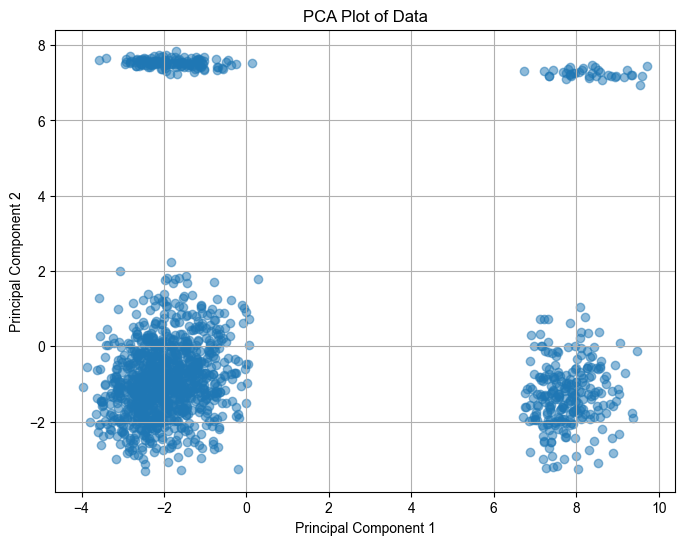

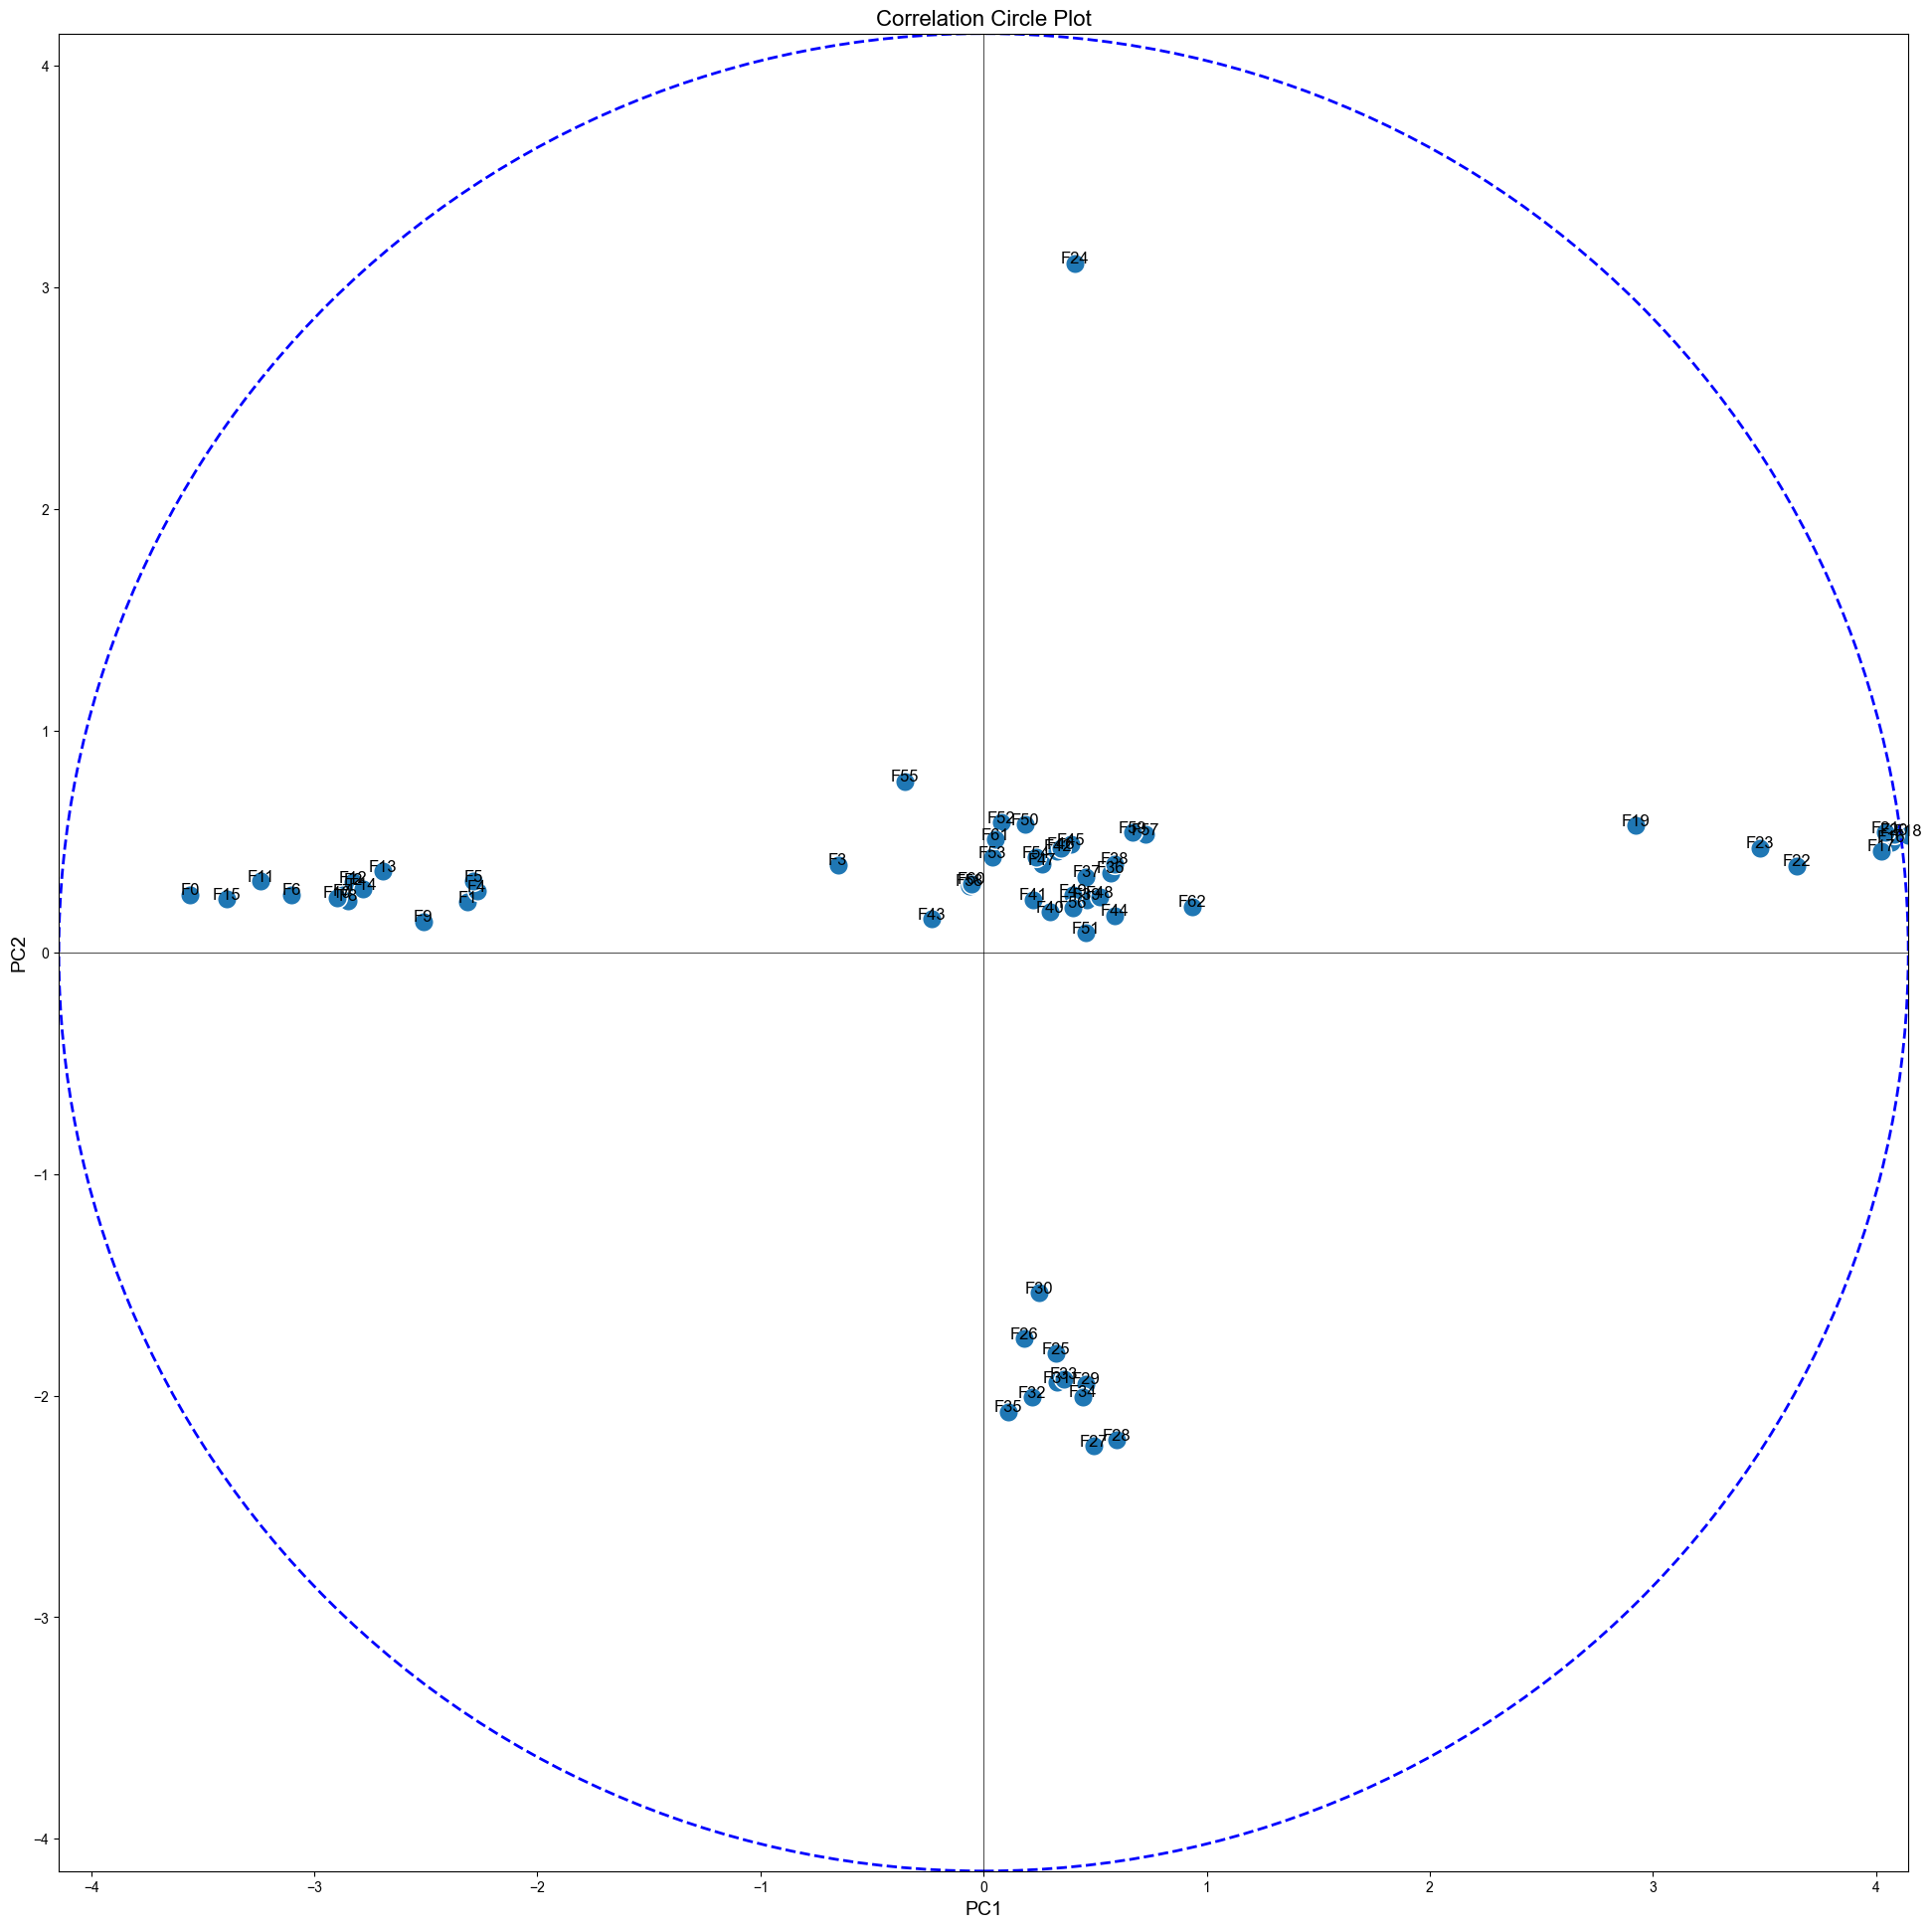

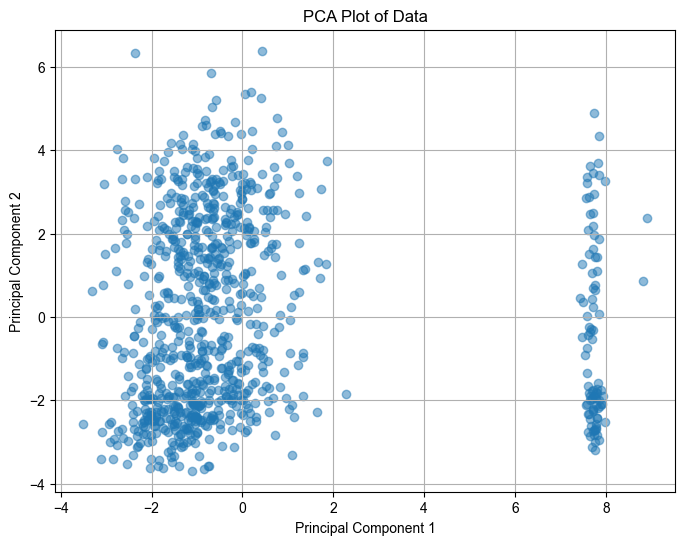

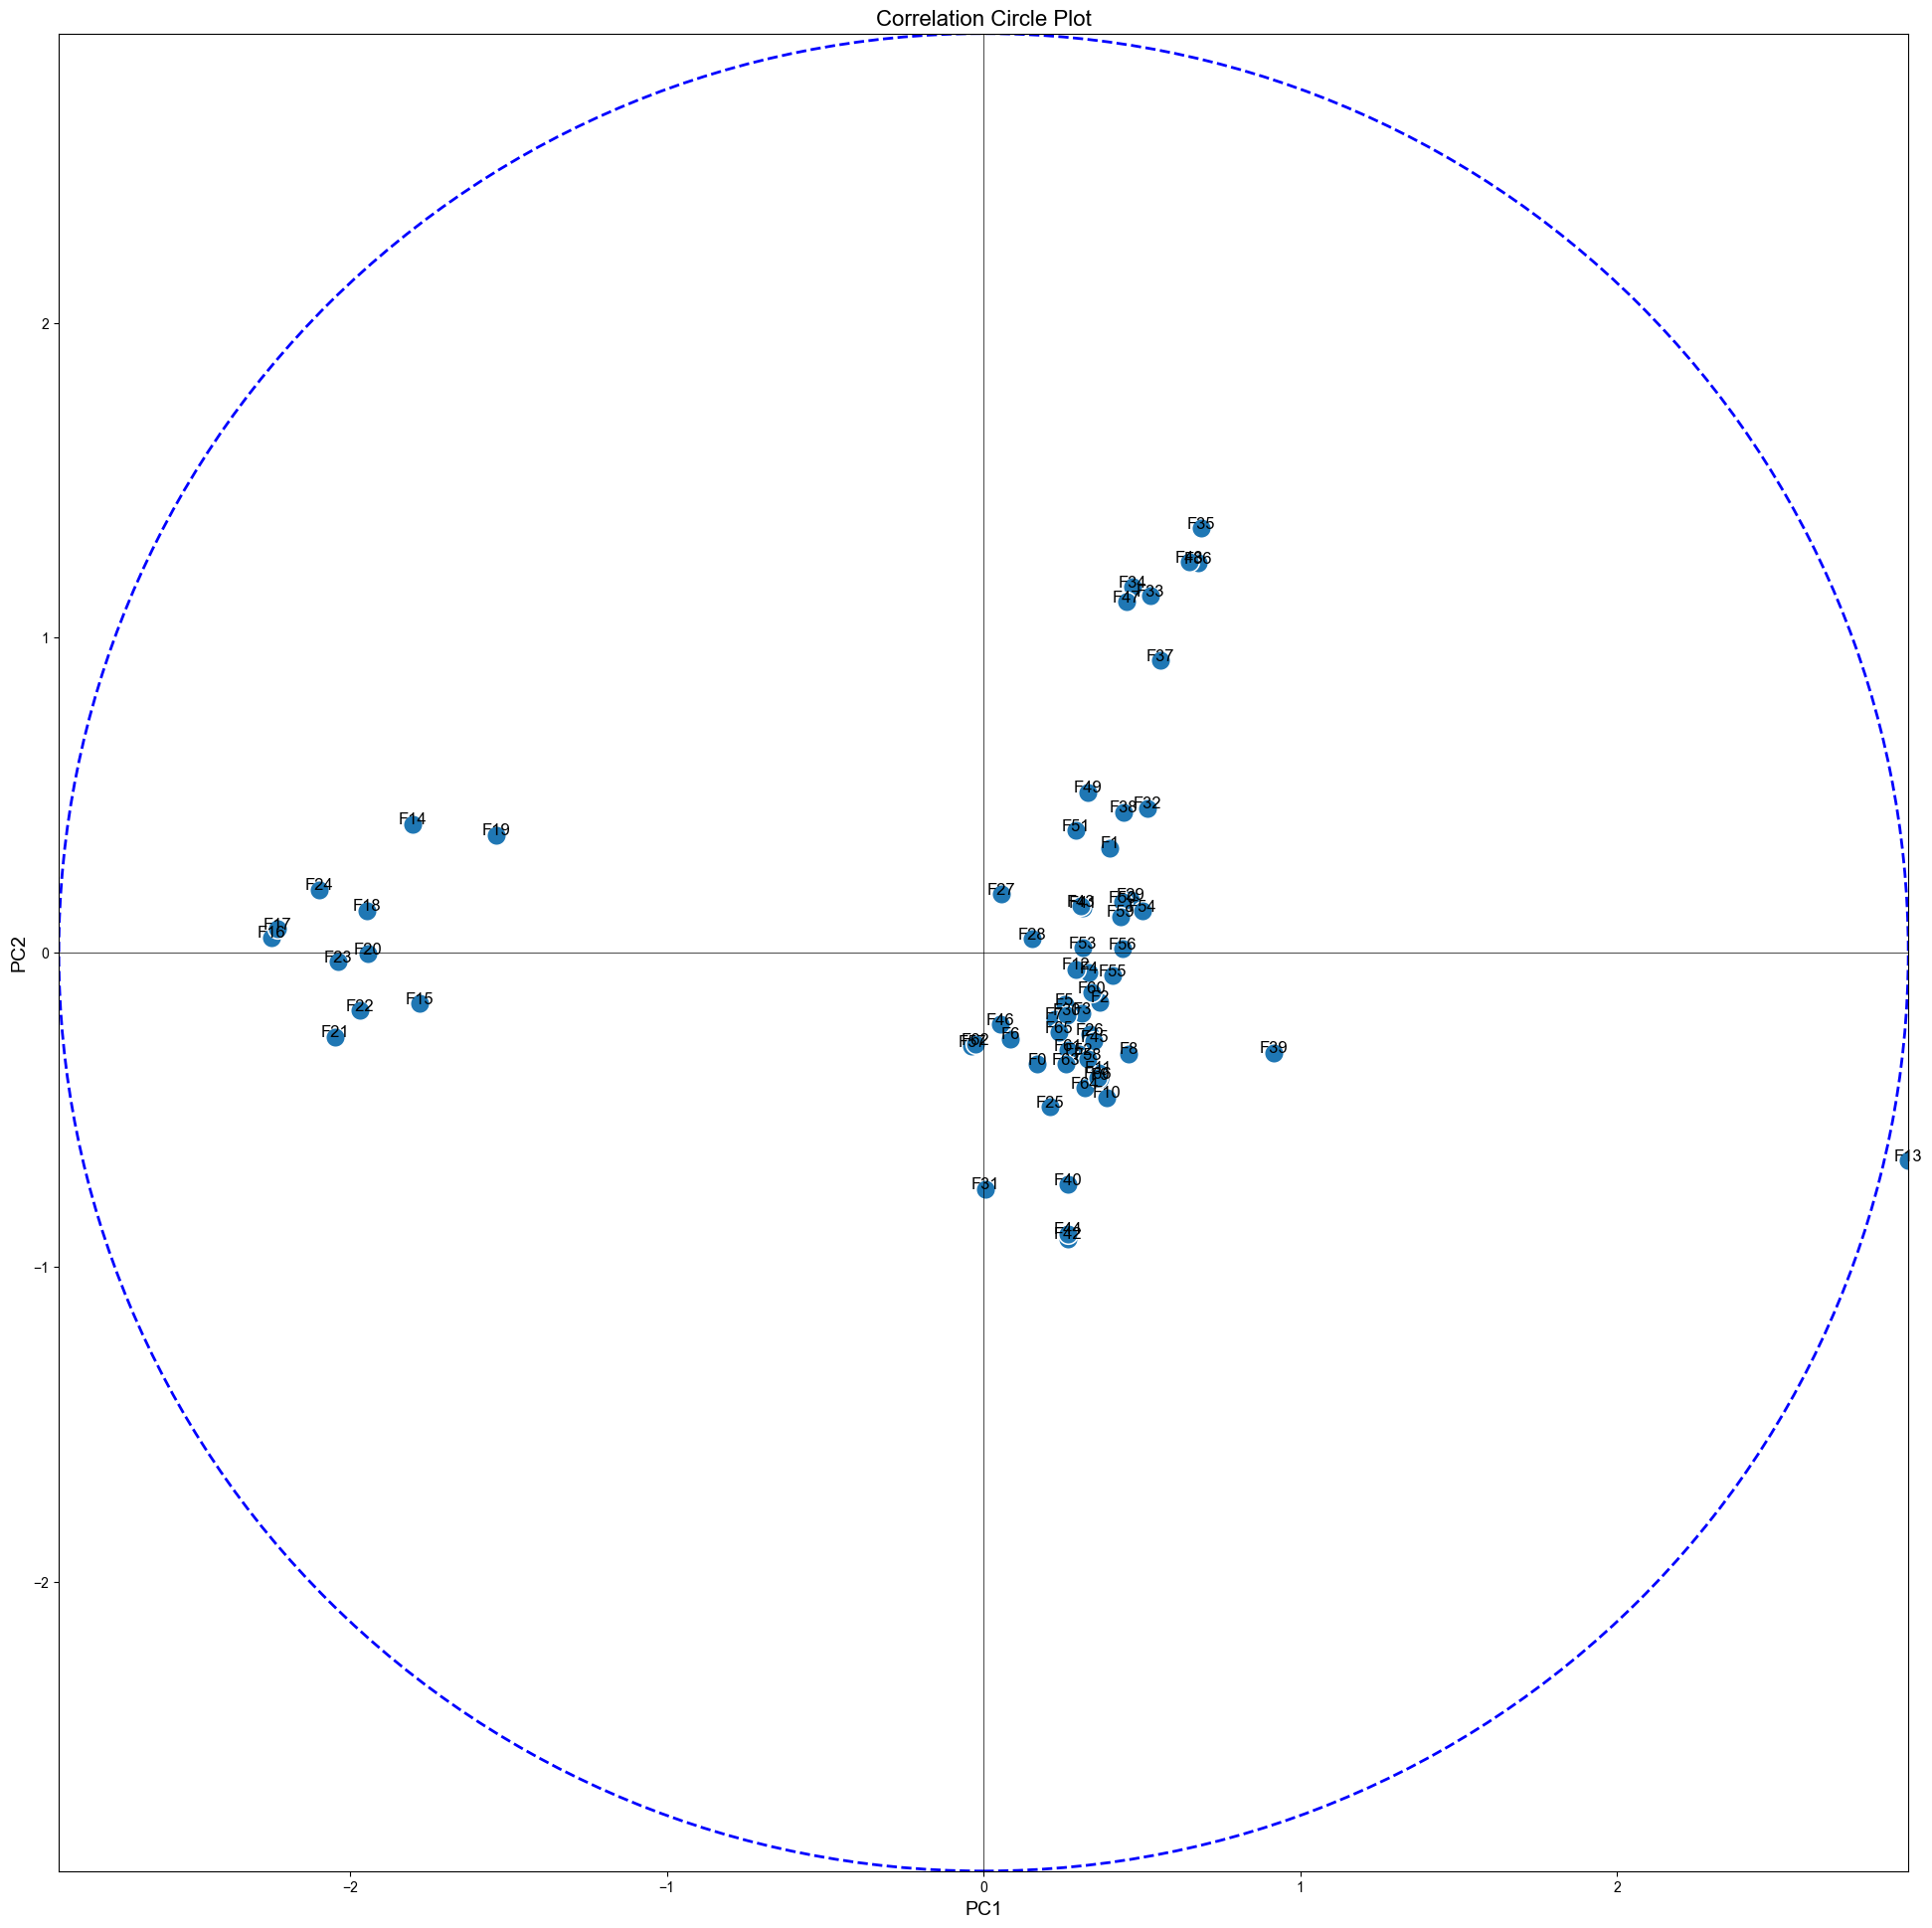

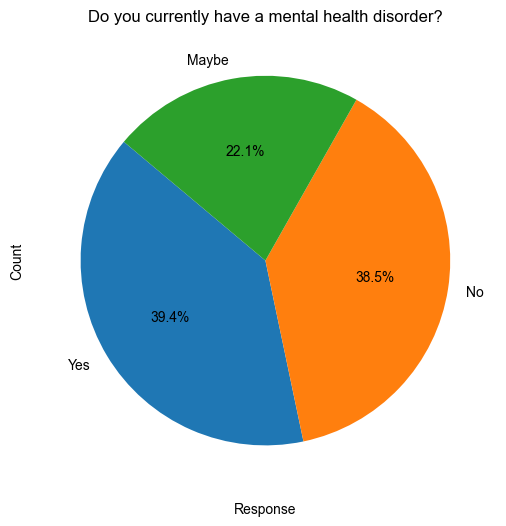

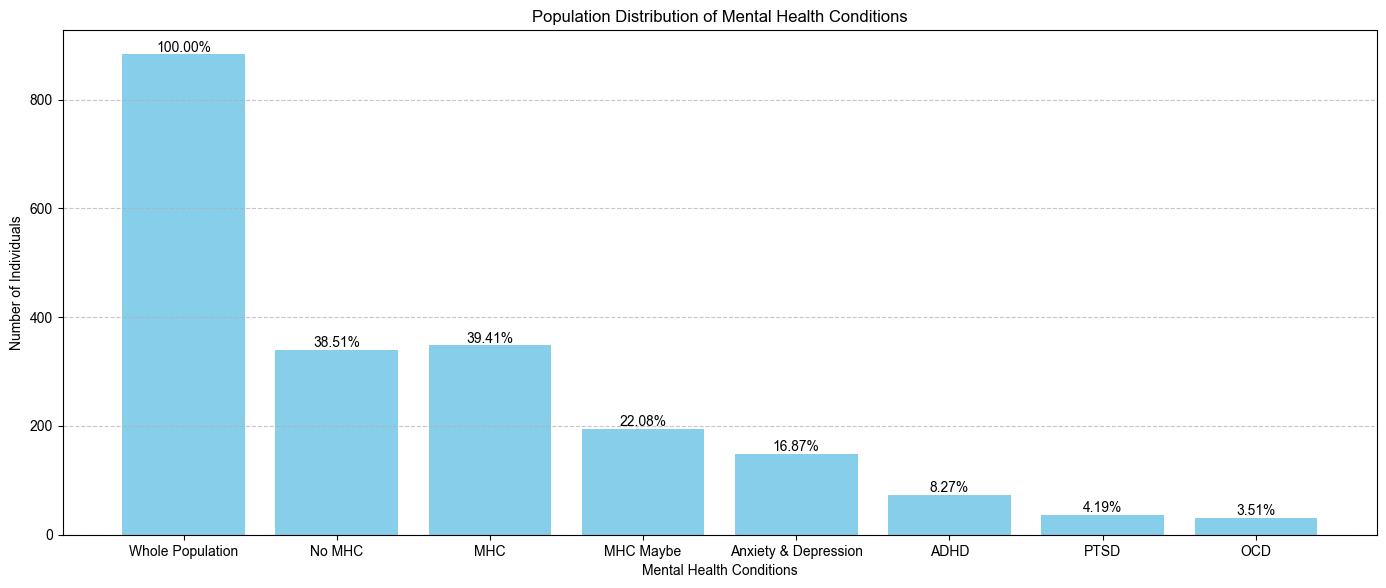

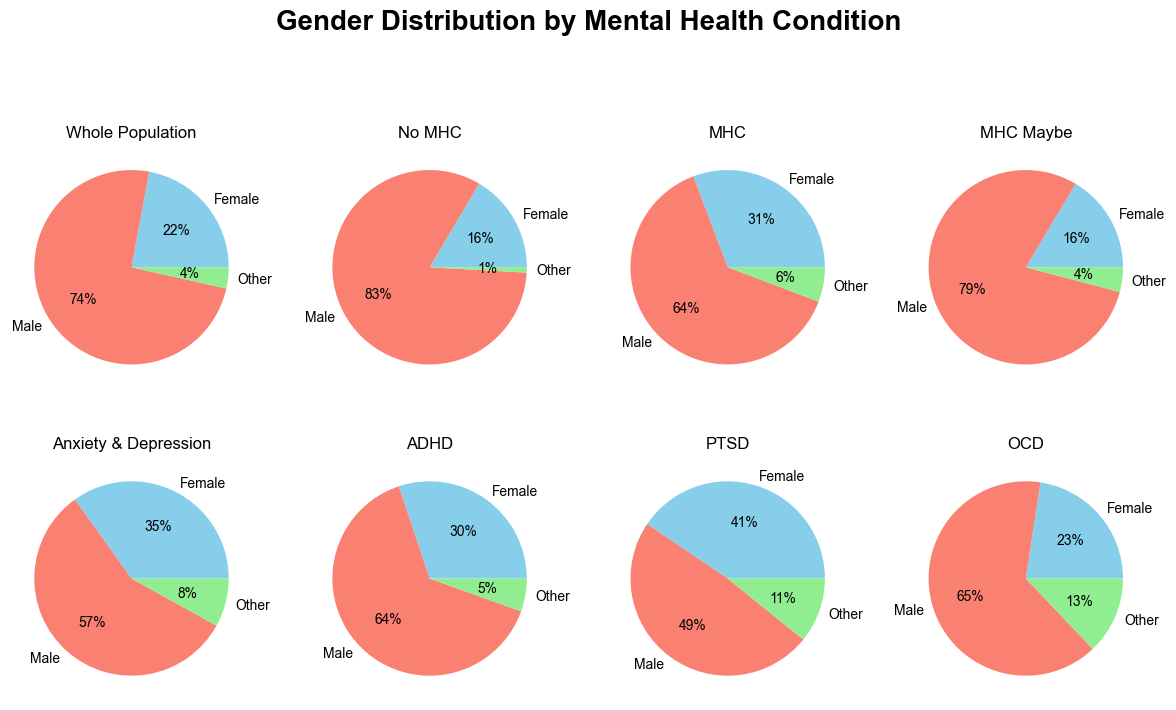

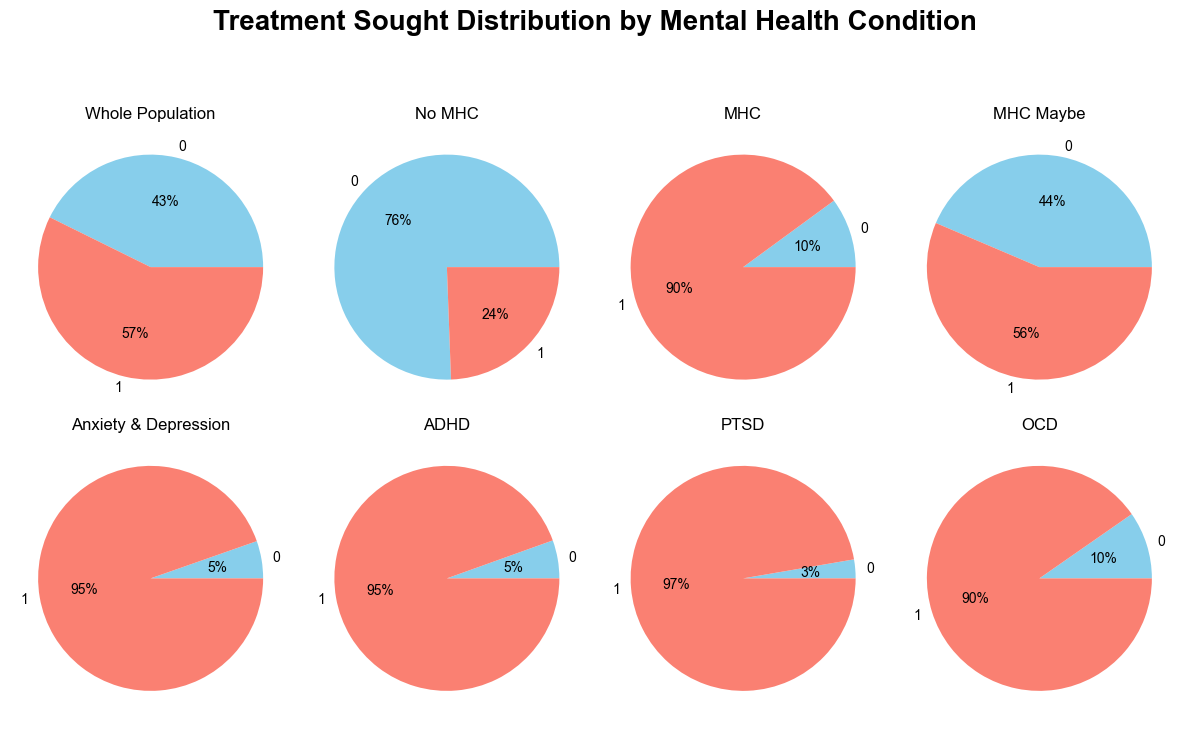

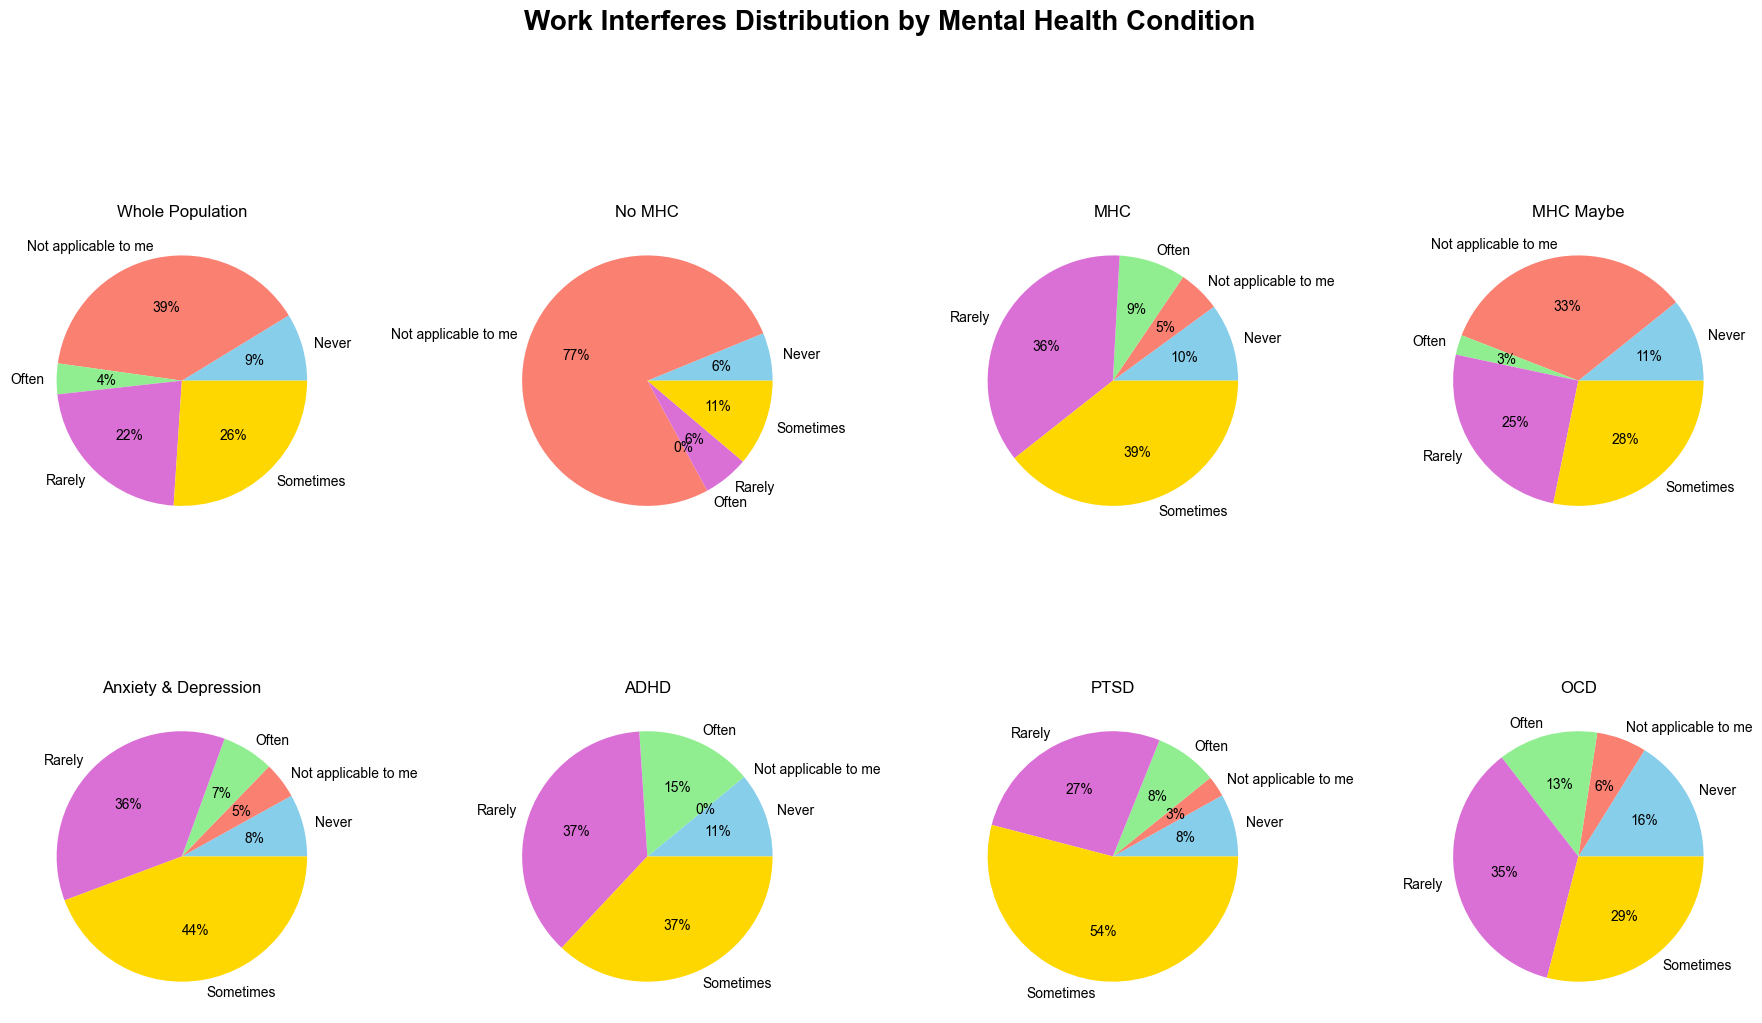

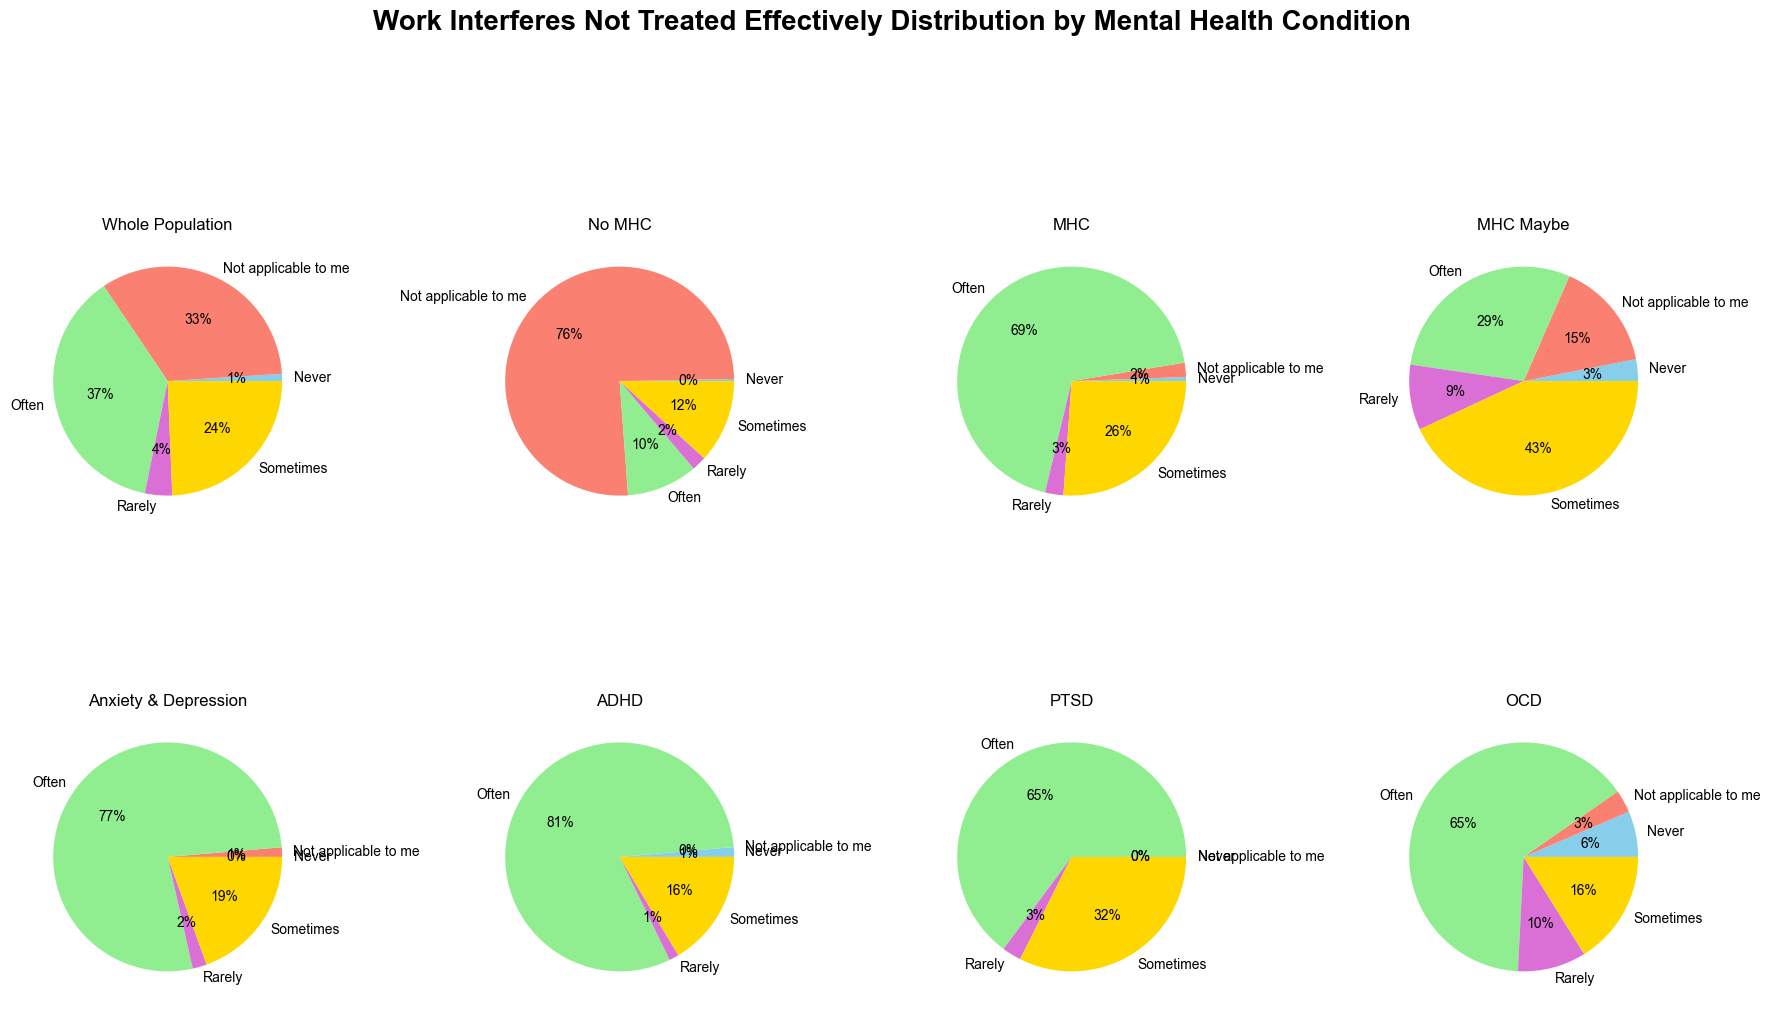

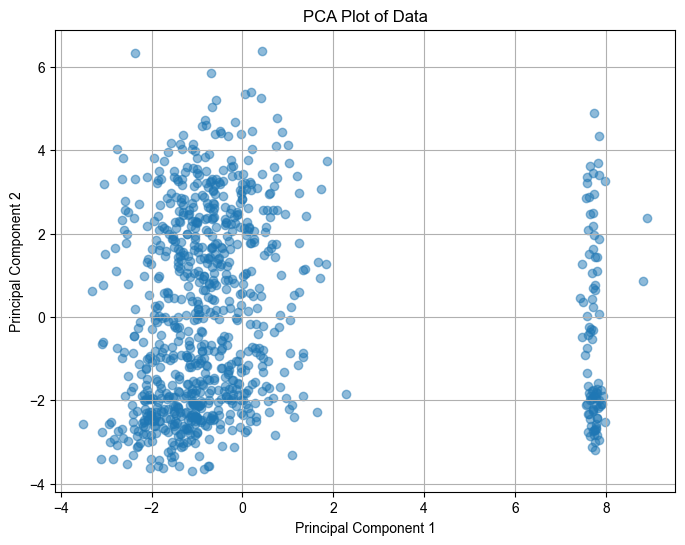

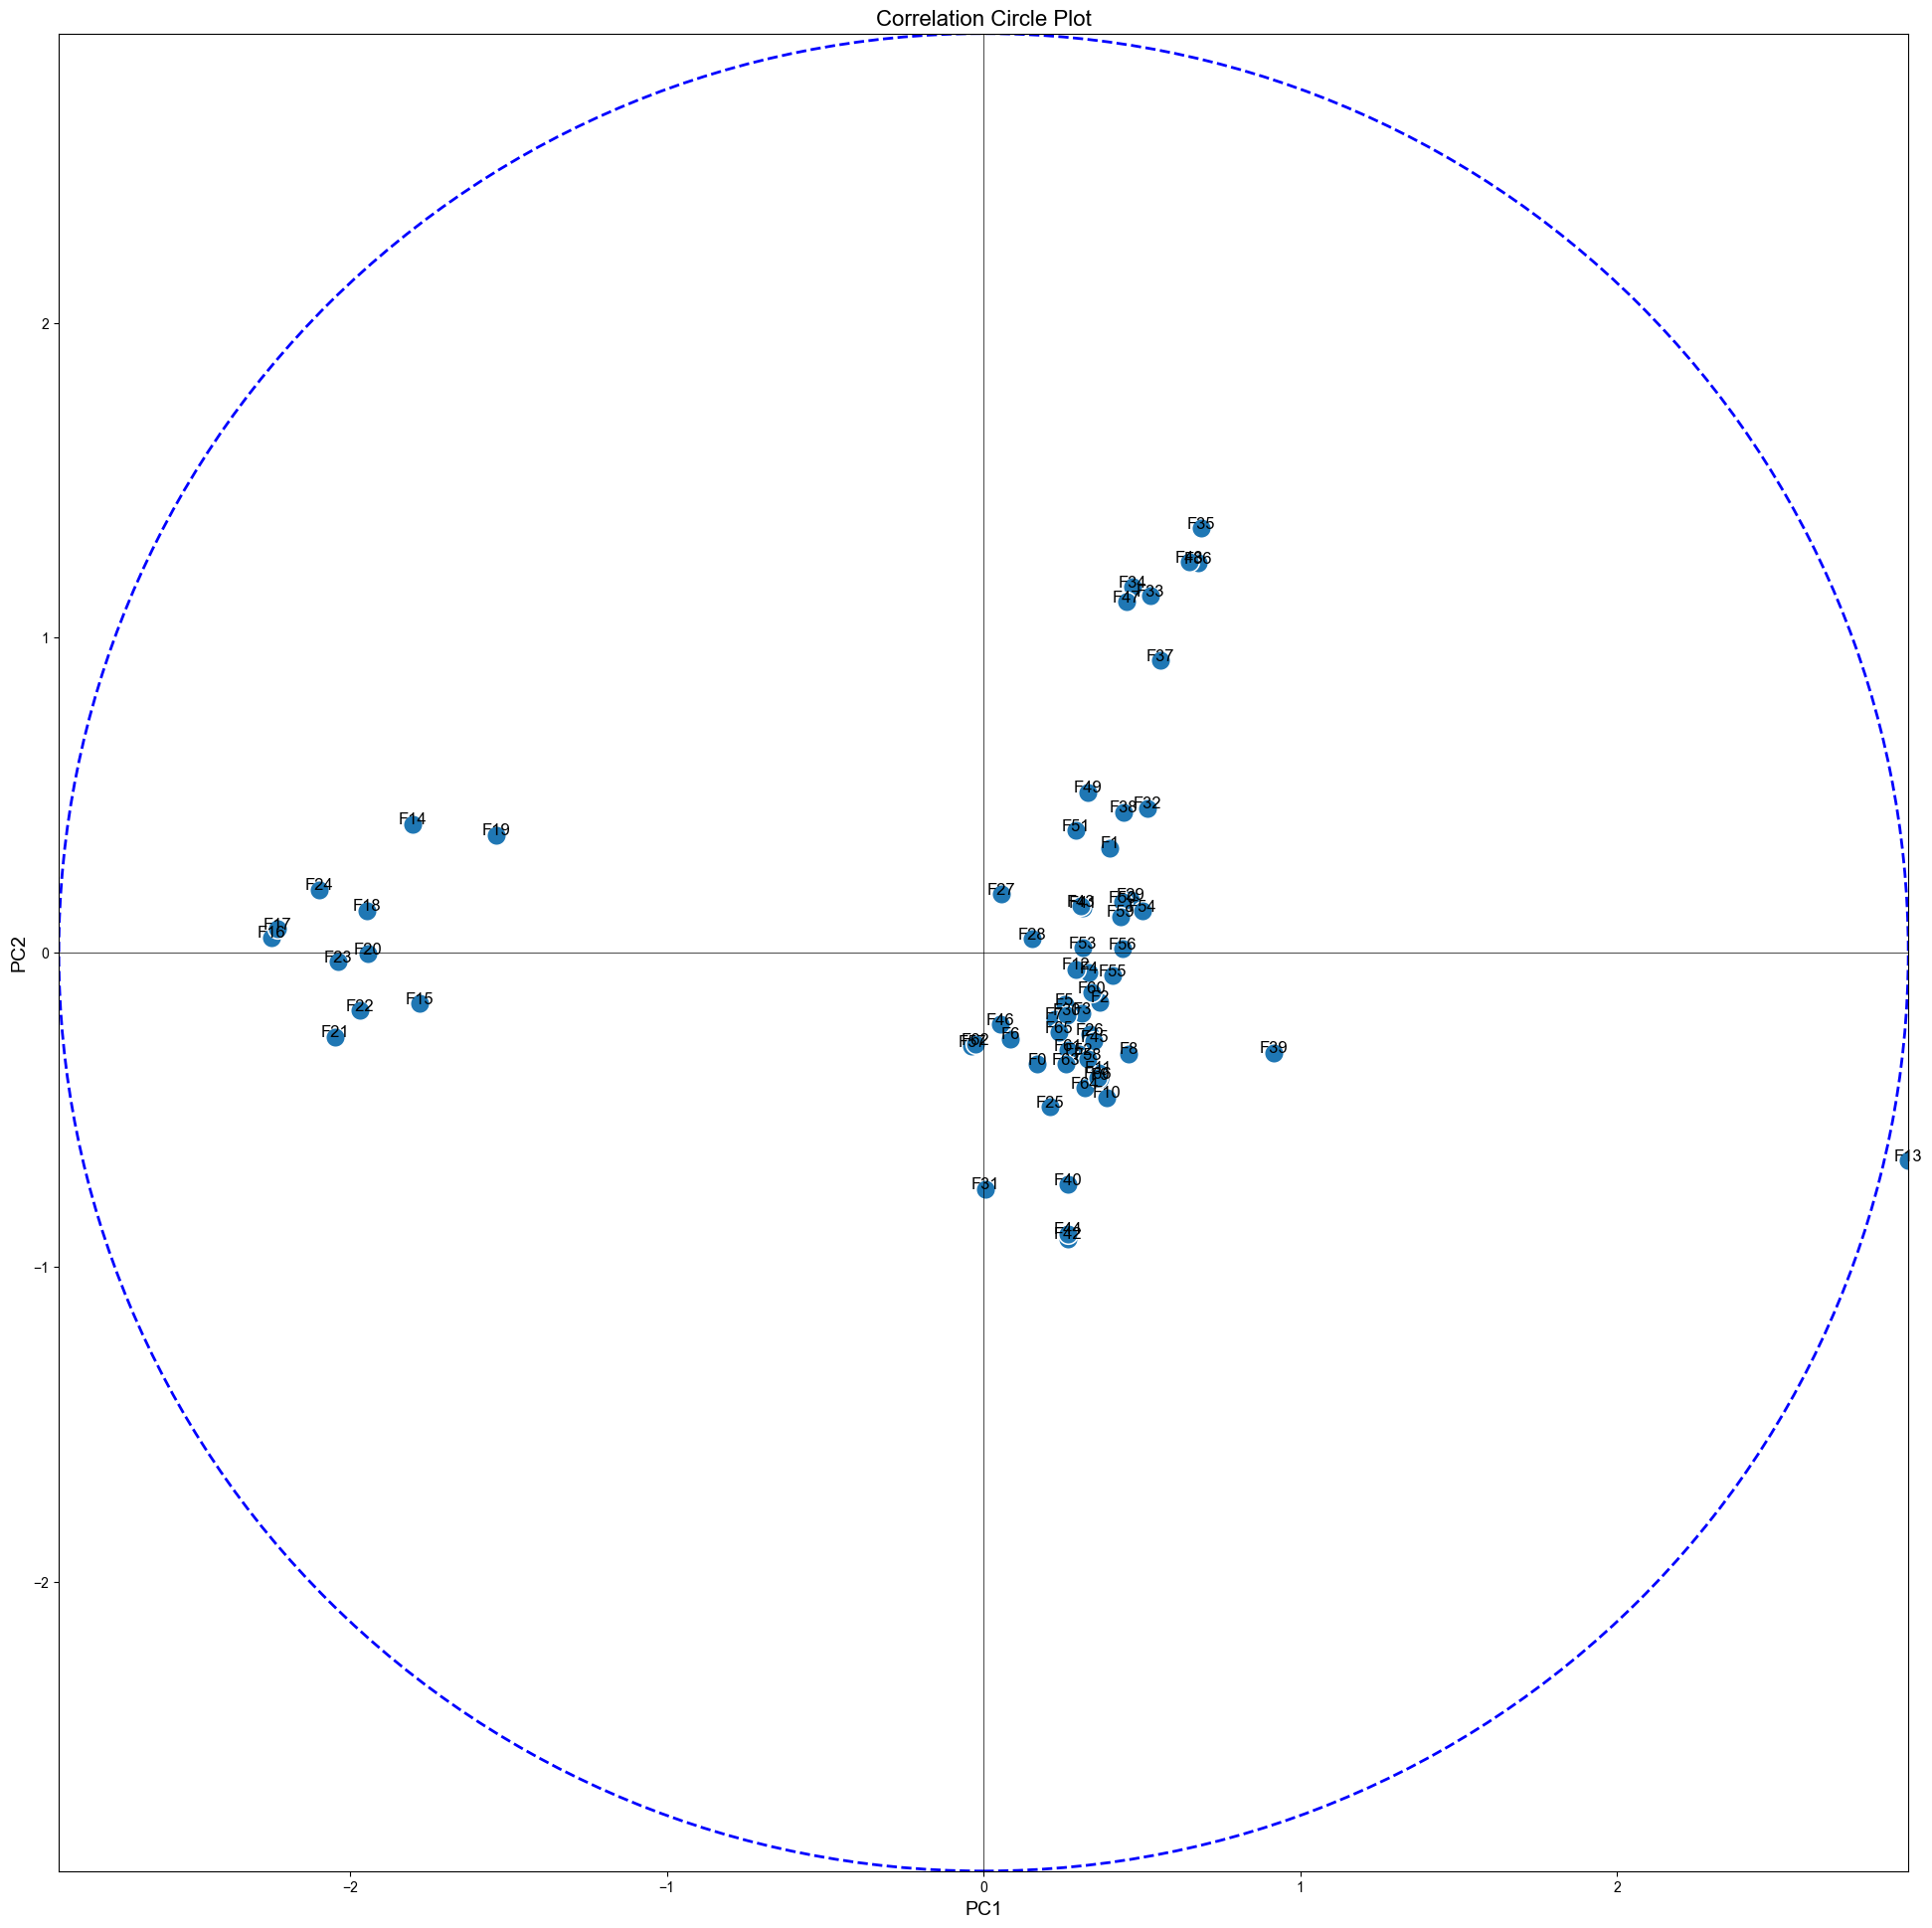

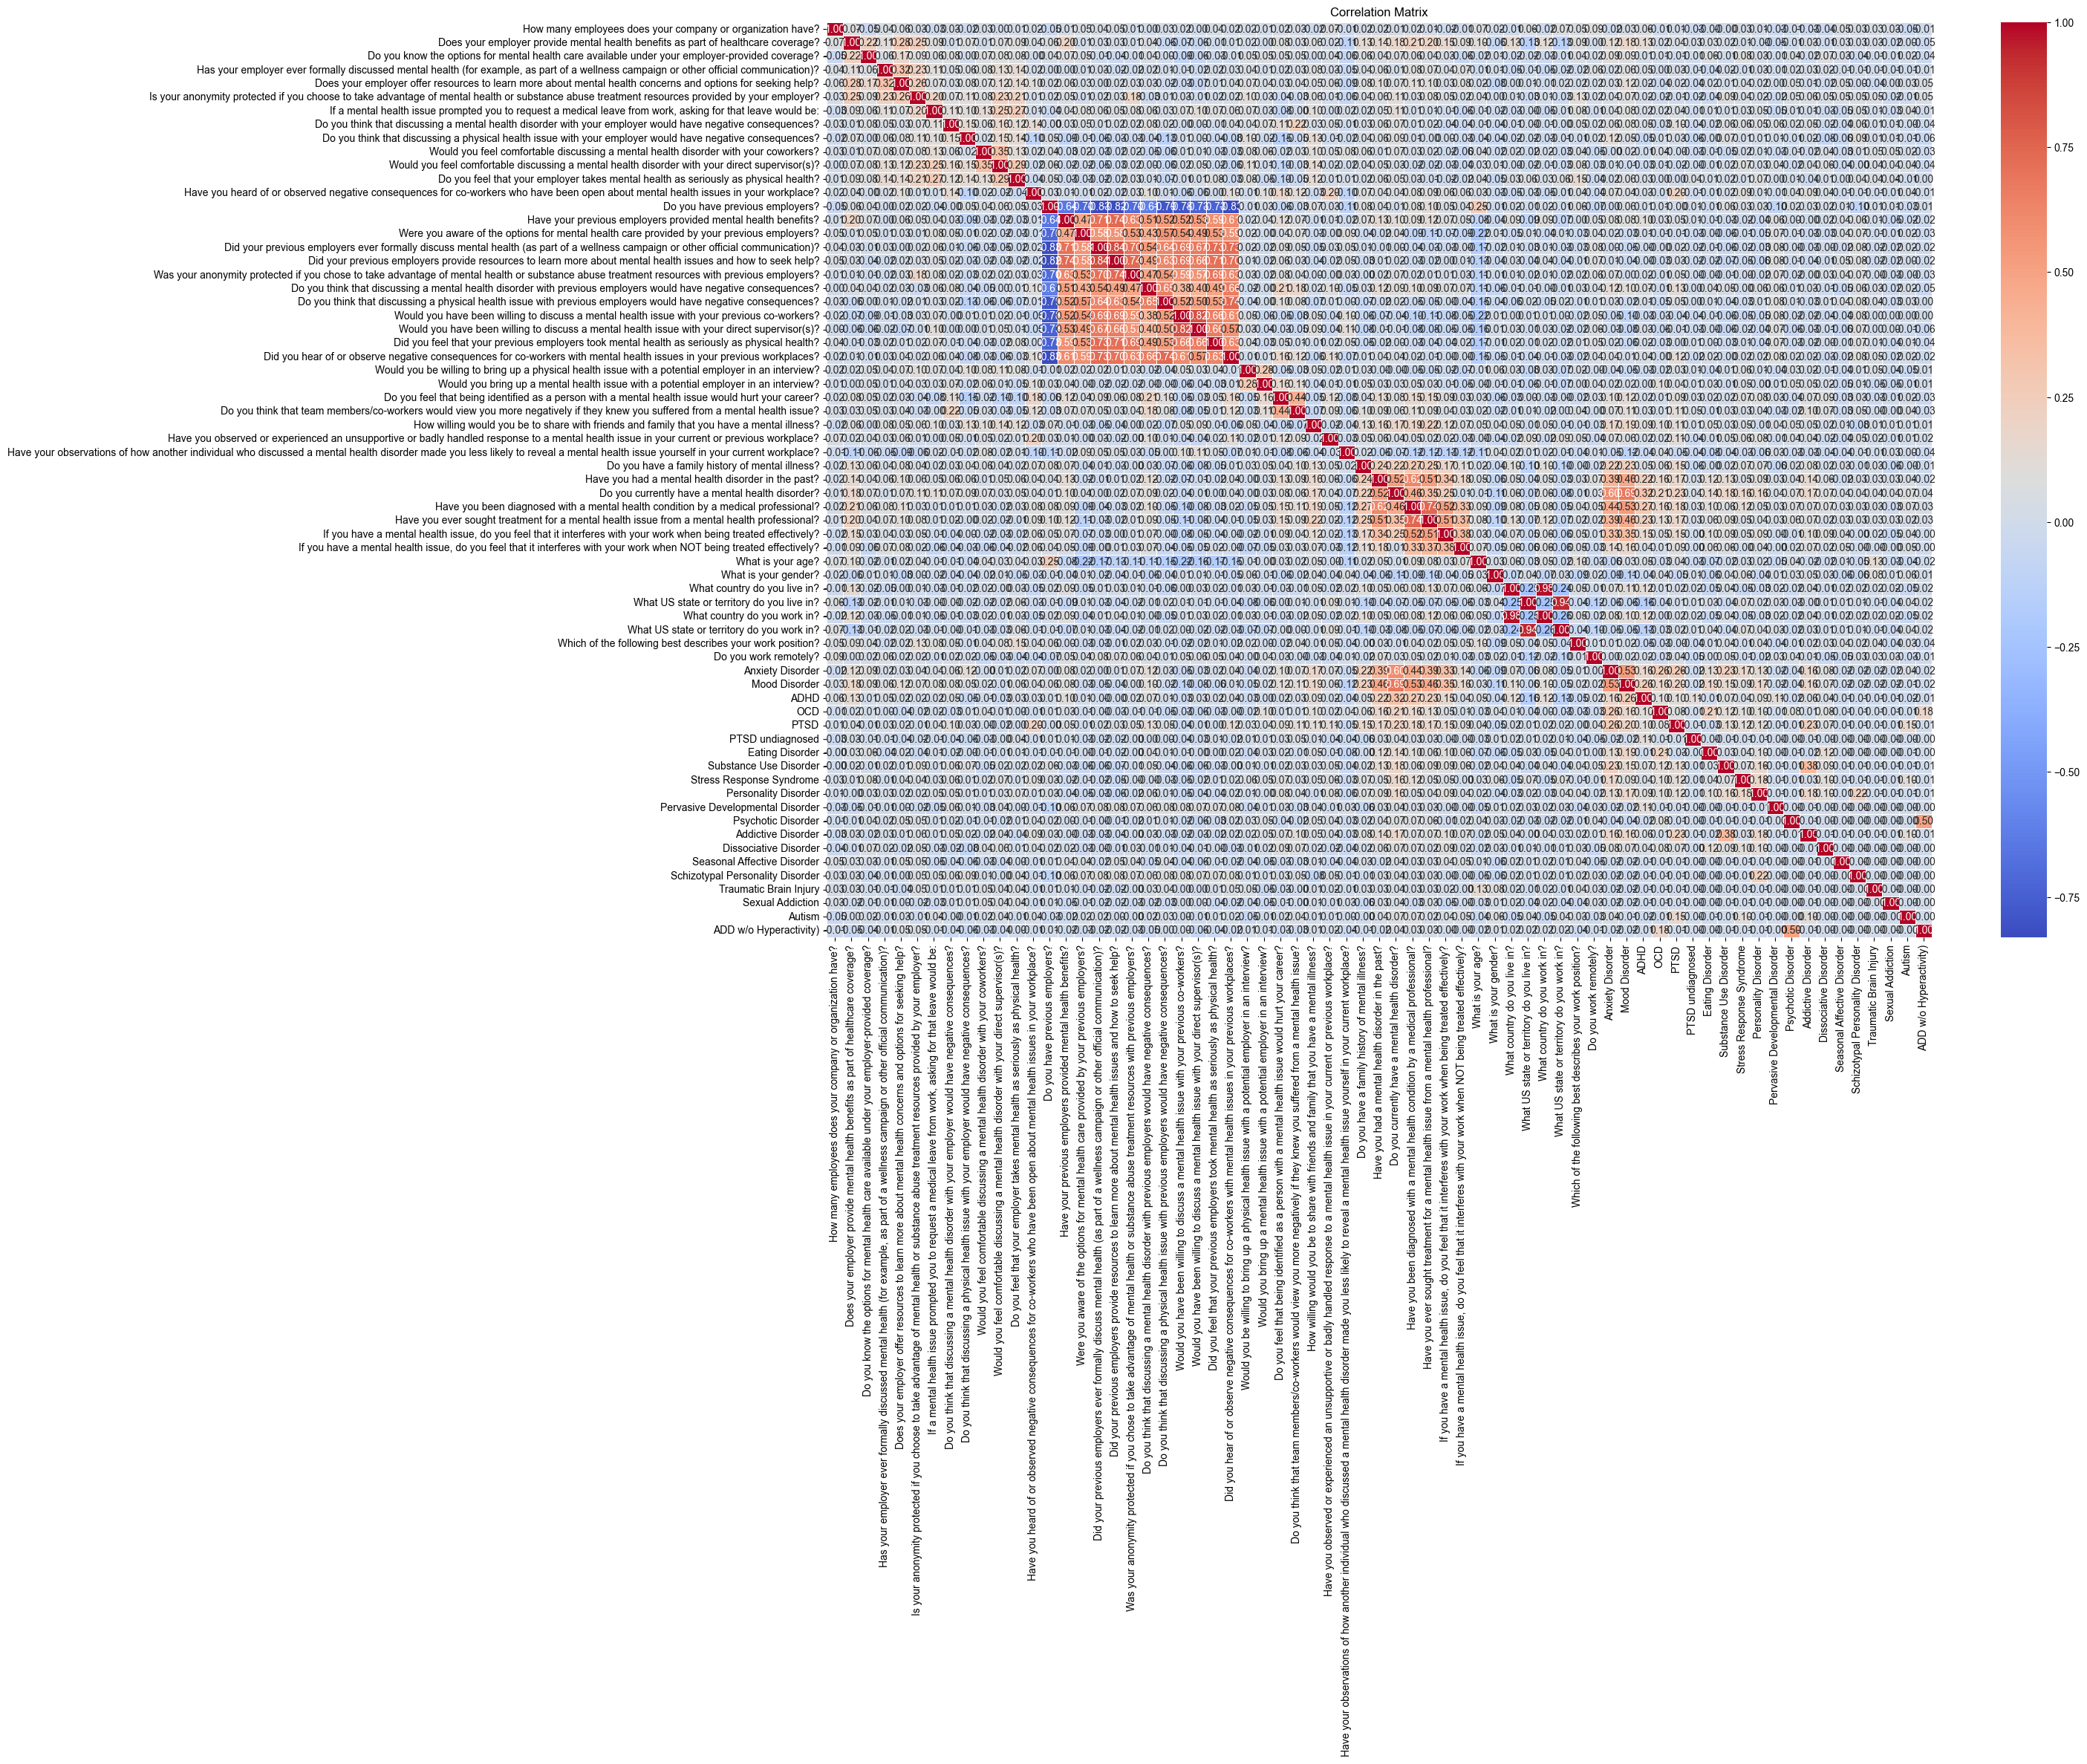

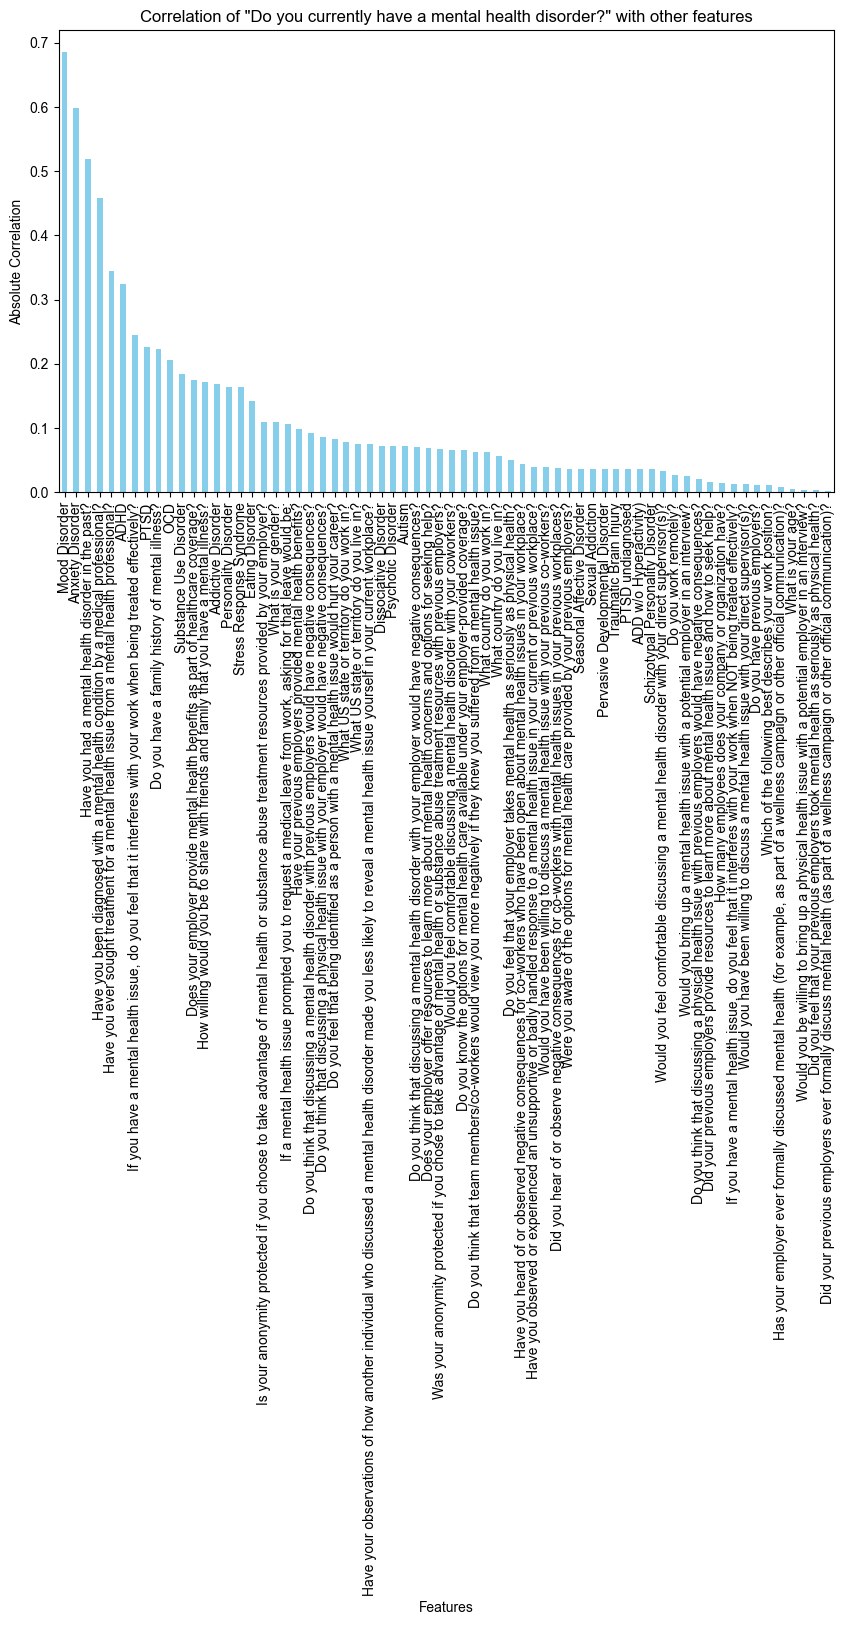

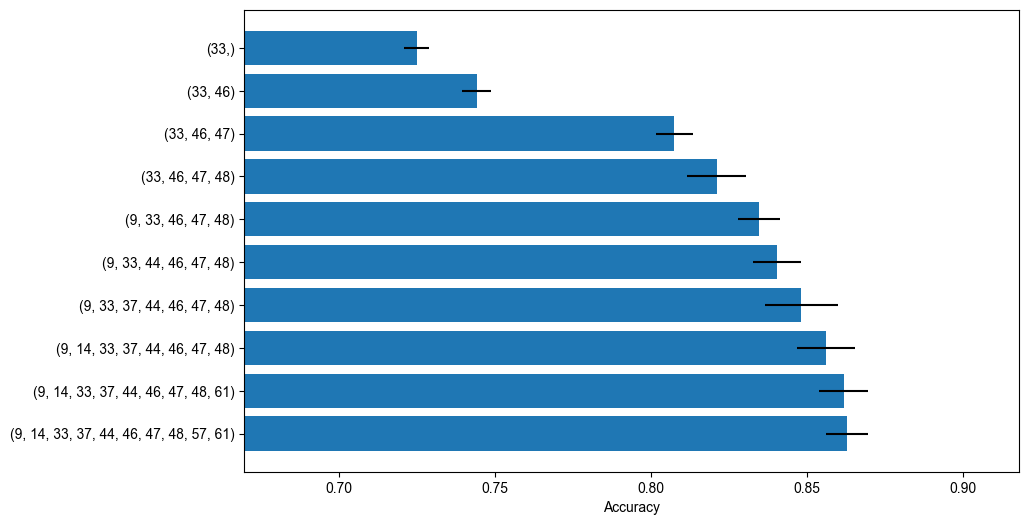

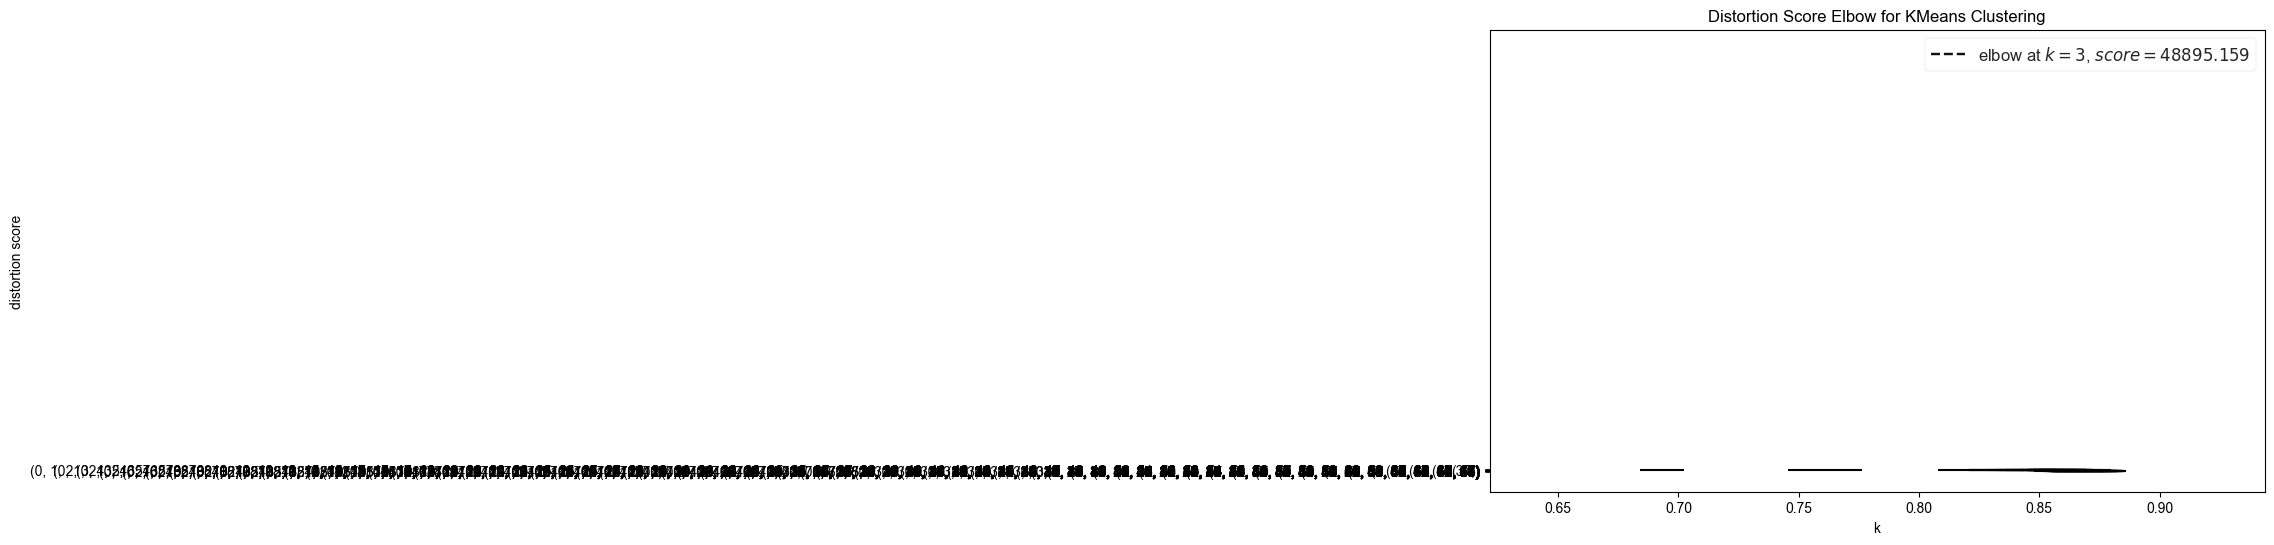

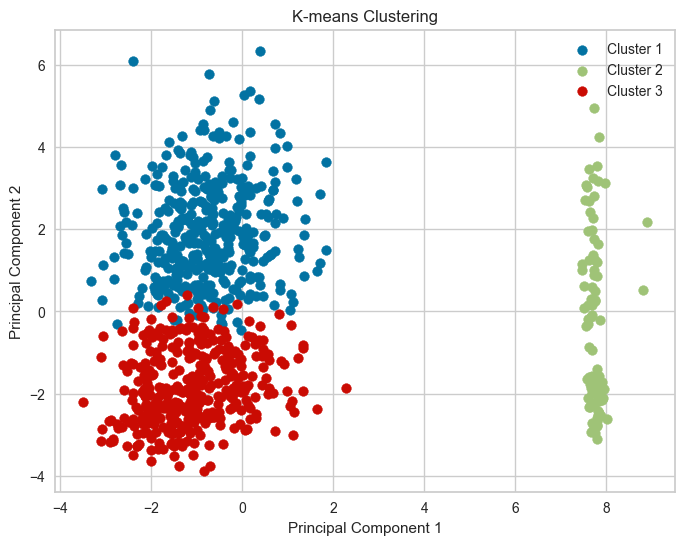

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None


def pca_plot_data(df, filename, save_format='png'):
    # Convert categorical variables to numerical
    encoder = LabelEncoder()
    df_encoded = df.apply(encoder.fit_transform)
    # df = pd.get_dummies(df)

    # Perform PCA
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_encoded)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled)

    # Plot PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Plot of Data')
    plt.grid(True)
    plt.savefig(f'{filename}.{save_format}', bbox_inches='tight')


def correlation_cycle_plot_data(df, filename, save_format='png'):
    # Convert categorical variables to numerical
    encoder = LabelEncoder()
    df_encoded = df.apply(encoder.fit_transform)
    # df = pd.get_dummies(df)

    corr_matrix = df_encoded.corr()

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(corr_matrix)

    # Create correlation circle plot
    plt.figure(figsize=(24, 24))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], s=200)

    # Plot variable names
    for i in range(len(df.columns)):
        plt.text(pca_result[i, 0], pca_result[i, 1], f"F{str(i)}", fontsize=12, ha='center')

    # Set plot labels and title
    plt.xlabel('PC1', fontsize=14)
    plt.ylabel('PC2', fontsize=14)
    plt.title('Correlation Circle Plot', fontsize=16)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    # plt.grid(True, linestyle='--', alpha=0.7)

    max_value = np.max(pca_result)

    # Add correlation circle
    circle = plt.Circle((0, 0), max_value, color='blue', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_artist(circle)

    # Manually set x and y limits
    plt.xlim(-max_value, max_value)
    plt.ylim(-max_value, max_value)

    plt.savefig(f'{filename}.{save_format}', bbox_inches='tight')

def high_uniqueness_features(df, threshold=10):
    high_uniqueness_features = []
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values > threshold:
            high_uniqueness_features.append(column)
    return high_uniqueness_features


def multiply_tuple_scalar(tuple_to_multiply, scalar):
    return tuple(value * scalar for value in tuple_to_multiply)

def create_sorted_dt(dt, label, base_label):
    counts = dt[base_label].value_counts().sort_index().reset_index()
    counts.columns = [base_label, label]
    return counts

def plot_dt_group_statistics(dt_statistics, statistics_feature, title, filename, save_format='png', figsize=1.0):
    fig, axs = plt.subplots(2, 4, figsize=multiply_tuple_scalar((12, 8), figsize))
    axs = axs.flatten()  # Flatten the subplot array for easier iteration

    colors = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'gold']
    # MHC_labels = [whole_population] + MHCs
    MHC_columns = dt_statistics.columns.to_list()[1:]
    # Plot each MHC distribution
    for ax, label, column in zip(axs, dt_group_labels, MHC_columns):
        ax.pie(dt_statistics[column], labels=dt_statistics[statistics_feature], colors=colors, autopct='%.0f%%')
        ax.set_title(label, fontsize=12)

    # Adjust layout and add title
    plt.suptitle(title, weight='bold', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout to make space for title

    plt.savefig(f'{filename}.{save_format}')

def plot_dataset(df):
    # Loop through each column and plot value counts
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Value Counts of {col}')
        plt.xticks(rotation=45)
        plt.show()

# Start ------------------------------------------------------------------------------------------- Loading File
# Define the file path
dt = pd.read_csv("archive/mental-heath-in-tech-2016_20161114.csv")
dt_rows, dt_columns = dt.shape

pca_plot_data(dt, filename="pca_plot_after_loading")
correlation_cycle_plot_data(dt, filename="correlation_cycle_plot_after_loading")

# get survey answers
print(f'Dataset Loaded:')  # \n{dt.head()}

def show_survey_questions():
    for i, column in enumerate(dt.columns):
        print(str(i) + " " + str(column))

mission_data_list = dt.isna().sum().tolist()
print(f"Mission data in columns: {mission_data_list}")

def show_missing_values(dt, more_than_p=0.3):
    dt_rows, _ = dt.shape
    mission_data_list = dt.isna().sum().tolist()
    more_than_n = dt_rows*more_than_p
    for i, n in enumerate(mission_data_list):
        if mission_data_list[i] >= more_than_n:
            print(f'{n / dt_rows: .2f}% Missing -> ({i}/{dt[dt.columns[i]].dtype}) {dt.columns[i]}')

show_missing_values(dt, more_than_p=0.26)
# Finish ------------------------------------------------------------------------------------------- Loading File

# Start ------------------------------------------------------------------------------------------- Dataset Preprocessing
# Cleaning Age Feature
filtered_values = dt[(dt['What is your age?'] > 99) | (dt['What is your age?'] < 18)]
print(f'Found in "What is your age?" {len(filtered_values)} incorrect data ')
filtered_indices = filtered_values.index
valid_age_indices = dt.index.difference(filtered_indices)
mean_age = dt.loc[valid_age_indices, 'What is your age?'].mean()
dt.loc[filtered_indices, 'What is your age?'] = int(mean_age)
print(f"Updated the {filtered_indices} with the int mean of others({int(mean_age)})")

# Cleaning Gender Feature
unique_values_gender_before = dt['What is your gender?'].unique()
print(f"The gender feature have {len(unique_values_gender_before)} unique values")
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'malr', 'mail', 'male.', 'sex is male', 'm|', 'cis male', 'cis man', 'male (cis)', 'dude']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'cis-woman', 'cisgender female', 'female assigned at birth', 'fem', 'female.', 'female ']:
        return 'Female'
    else:
        return 'Other'

dt['What is your gender?'] = dt['What is your gender?'].apply(clean_gender)
print(f"After processing gender feature have 3 unique values: {dt['What is your gender?'].unique()}")


# Cleaning not relevant data
def show_data_to_be_removed_relevant_info(feature_key, expected_value):
    dataset_len = len(dt[feature_key])
    dataset_interested_in_len = len(dt.loc[(dt[feature_key] == expected_value)])
    print(f'Feature "{feature_key}" have unique values: {dt[feature_key].unique()}')
    print(f'Interested dat values is "{expected_value}"')
    print(f'The drop in percentage is {1 - dataset_interested_in_len/dataset_len: .2f}%')

for feature_key, expected_value in [('Are you self-employed?', 0), ('Is your employer primarily a tech company/organization?', 1)]:
    show_data_to_be_removed_relevant_info(feature_key, expected_value)

# Select only participants working for a company
dt = dt.loc[(dt['Are you self-employed?'] == 0)]
dt = dt.reset_index(drop=True)

# Select only participants working for a tech company
dt = dt.loc[(dt['Is your employer primarily a tech company/organization?'] == 1)]
dt = dt.reset_index(drop=True)



#Create separate columns for presence of each MHC for easier filter
details_about_condition_feature_key = 'If yes, what condition(s) have you been diagnosed with?'
print(dt[details_about_condition_feature_key].value_counts())
conditions = {
    'Anxiety Disorder': 'Anxiety Disorder',
    'Mood Disorder': 'Mood Disorder',
    'ADHD': 'Attention',
    'OCD': 'Compulsive',
    'PTSD': 'Post',
    'PTSD undiagnosed': 'PTSD \(undiagnosed\)',
    'Eating Disorder': 'Eating',
    'Substance Use Disorder': 'Substance',
    'Stress Response Syndrome': 'Stress Response',
    'Personality Disorder': 'Personality Disorder',
    'Pervasive Developmental Disorder': 'Pervasive',
    'Psychotic Disorder': 'Psychotic',
    'Addictive Disorder': 'Addictive Disorder',
    'Dissociative Disorder': 'Dissociative',
    'Seasonal Affective Disorder': 'Seasonal',
    'Schizotypal Personality Disorder': 'Schizotypal',
    'Traumatic Brain Injury': 'Brain',
    'Sexual Addiction': 'Sexual',
    'Autism': 'Autism',
    'ADD w/o Hyperactivity)': 'ADD \(w/o Hyperactivity\)'
}

for condition, substring in conditions.items():
    dt[condition] = dt[details_about_condition_feature_key].str.contains(substring)
    # dt[condition].fillna(False, inplace=True)
    dt[condition] = dt[condition].fillna(False) #.infer_objects(copy=False)

# If users was not living in USA
columns_to_fill_none_str = [
    'What US state or territory do you live in?',
    'What US state or territory do you work in?'
]
dt[columns_to_fill_none_str] = dt[columns_to_fill_none_str].fillna("None")



# To remove columns wehre user was writing own text(this can be done by checking the unicue values)
# Check for features with high nuniques
high_uniqueness_feats = high_uniqueness_features(dt, threshold=10)
print("Features with more than 10 unique values:", high_uniqueness_feats)
# Delete features that user was writing by himself
own_user_type_description_feature_keys = [
    'Why or why not?',
    'Why or why not?.1',
    'If yes, what condition(s) have you been diagnosed with?',
    'If maybe, what condition(s) do you believe you have?',
    'If so, what condition(s) were you diagnosed with?'
]
dt.drop(columns=own_user_type_description_feature_keys, inplace=True)


# print(dt['Are you self-employed?'].value_counts())
# print(dt['How many employees does your company or organization have?'].value_counts())
# print(dt['Is your primary role within your company related to tech/IT?'].value_counts())
# print(dt['Is your primary role within your company related to tech/IT?'].nunique())
features_with_no_variance = dt.columns[dt.nunique() <= 1]
dt.drop(columns=features_with_no_variance, inplace=True)


pca_plot_data(dt, filename="pca_plot_after_data_processing")
correlation_cycle_plot_data(dt, filename="correlation_cycle_plot_after_data_processing")
# Finish ------------------------------------------------------------------------------------------- Dataset Preprocessing


# Start ------------------------------------------------------------------------------------------- Dataset Visualizing

currently_have_mental_health_disorder_feature_counts = dt['Do you currently have a mental health disorder?'].value_counts()
print(currently_have_mental_health_disorder_feature_counts)
# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    currently_have_mental_health_disorder_feature_counts.values.tolist(),
    labels=currently_have_mental_health_disorder_feature_counts.index.tolist(),
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Do you currently have a mental health disorder?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.savefig('mental_health_disorder_plot.png')


# Splitting to smaller datasets
# dt_no_MHD = dt.loc[pd.isna(dt[details_about_condition_feature_key])]
dt_no_MHD = dt.loc[(dt['Do you currently have a mental health disorder?'] == "No")]
dt_yes_MHD = dt.loc[(dt['Do you currently have a mental health disorder?'] == "Yes")]
dt_maybe_MHD = dt.loc[(dt['Do you currently have a mental health disorder?'] == "Maybe")]
dt_anx_dep = dt.loc[(dt['Anxiety Disorder'] == 1) & (dt['Mood Disorder'] == 1)]
dt_adhd = dt.loc[(dt['ADHD'] == 1)]
dt_ocd = dt.loc[(dt['OCD'] == 1)]
dt_ptsd = dt.loc[(dt['PTSD'] == 1)]

#Display population size of each group
total_population_len = len(dt)
dt_group = [
    (dt, 'Whole Population'),
    (dt_no_MHD, 'No MHC'),
    (dt_yes_MHD, 'MHC'),
    (dt_maybe_MHD, 'MHC Maybe'),
    (dt_anx_dep, 'Anxiety & Depression'),
    (dt_adhd, 'ADHD'),
    (dt_ptsd, 'PTSD'),
    (dt_ocd, 'OCD')
]
dt_group_labels = [label for _, label in dt_group]
dt_group_datasets = [data for data, _ in dt_group]
dt_group_datasets_counts = [len(data) for data in dt_group_datasets]
percentages = [(len(data) / total_population_len) * 100 for data in dt_group_datasets]
dt_MHD_count = pd.DataFrame({
    'Population': dt_group_labels,
    'Count': dt_group_datasets_counts,
    'Percentage': percentages
})

# Plot dt_MHD_count DataFrame
plt.figure(figsize=(14, 6))
bars = plt.bar(dt_group_labels, dt_group_datasets_counts, color='skyblue')
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{percentage:.2f}%', ha='center', color='black')
plt.title('Population Distribution of Mental Health Conditions')
plt.xlabel('Mental Health Conditions')
plt.ylabel('Number of Individuals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('population_count_plot.png')


# Gender statistics
dt_gender = None
for data, label in dt_group:
    counts_MHC = create_sorted_dt(data, f'What is your gender? ({label})', base_label='What is your gender?')
    dt_gender = dt_gender.merge(counts_MHC, on='What is your gender?', how='left') if dt_gender is not None else counts_MHC

# Plotting
plot_dt_group_statistics(
    dt_statistics=dt_gender,
    statistics_feature='What is your gender?',
    title='Gender Distribution by Mental Health Condition',
    filename="population_count_by_gender_plot"
)


# Age statistics
age_stats = {}
for data, label in dt_group:
    age_stats[label] = data['What is your age?'].describe()
dt_age_stats = pd.DataFrame(age_stats).reset_index()
dt_age_stats.columns = ['Statistic'] + dt_group_labels
print(dt_age_stats)


# sought treatment statistics
sought_treatment_feature = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
dt_treated_sought_counts = None
for data, label in dt_group:
    counts_MHC = create_sorted_dt(data, label, base_label=sought_treatment_feature)
    dt_treated_sought_counts = dt_treated_sought_counts.merge(counts_MHC, on=sought_treatment_feature, how='left') if dt_treated_sought_counts is not None else counts_MHC
dt_treated_sought_counts = dt_treated_sought_counts.fillna(0)
# Plotting sought treatment statistics
plot_dt_group_statistics(
    dt_statistics=dt_treated_sought_counts,
    statistics_feature=sought_treatment_feature,
    title='Treatment Sought Distribution by Mental Health Condition',
    filename="population_count_by_treatment_sought_plot"
)




# work interfere statistics
mhc_interferes_with_work_feature = 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'
dt_mhc_interferes_with_work_feature_counts = None
for data, label in dt_group:
    counts_MHC = create_sorted_dt(data, label, base_label=mhc_interferes_with_work_feature)
    dt_mhc_interferes_with_work_feature_counts = dt_mhc_interferes_with_work_feature_counts.merge(counts_MHC, on=mhc_interferes_with_work_feature, how='left') if dt_mhc_interferes_with_work_feature_counts is not None else counts_MHC
dt_mhc_interferes_with_work_feature_counts = dt_mhc_interferes_with_work_feature_counts.fillna(0)
# Plotting work interfere statistics
plot_dt_group_statistics(
    dt_statistics=dt_mhc_interferes_with_work_feature_counts,
    statistics_feature=mhc_interferes_with_work_feature,
    title='Work Interferes Distribution by Mental Health Condition',
    filename="population_count_by_mhc_work_interferes_plot",
    figsize=1.5
)



# work interfere not treated effectively statistics
work_interfere_not_treated_effectively_feature = 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
work_interfere_not_treated_effectively_feature_counts = None
for data, label in dt_group:
    counts_MHC = create_sorted_dt(data, label, base_label=work_interfere_not_treated_effectively_feature)
    work_interfere_not_treated_effectively_feature_counts = work_interfere_not_treated_effectively_feature_counts.merge(counts_MHC, on=work_interfere_not_treated_effectively_feature, how='left') if work_interfere_not_treated_effectively_feature_counts is not None else counts_MHC
work_interfere_not_treated_effectively_feature_counts = work_interfere_not_treated_effectively_feature_counts.fillna(0)
# Plotting work interfere statistics
plot_dt_group_statistics(
    dt_statistics=work_interfere_not_treated_effectively_feature_counts,
    statistics_feature=work_interfere_not_treated_effectively_feature,
    title='Work Interferes Not Treated Effectively Distribution by Mental Health Condition',
    filename="population_count_by_work_interfere_not_treated_effectively_plot",
    figsize=1.5
)


# save dataset
dt.to_csv("my_dt.csv", index=False)

# print(dt.shape)
# print(dt['Do you know the options for mental health care available under your employer-provided coverage?'].value_counts())
# Finish ------------------------------------------------------------------------------------------- Dataset Visualizing

# Start ------------------------------------------------------------------------------------------- Filling None values
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge


# Convert categorical variables to numerical
encoder = LabelEncoder()
df_encoded = dt.apply(encoder.fit_transform)
# dt_dummies = pd.get_dummies(dt)

#%% apply regression imputation using ‘Bayesian Ridge’
column_names = df_encoded.columns.tolist()
imputbr = IterativeImputer(BayesianRidge())
dt = pd.DataFrame(imputbr.fit_transform(df_encoded))
dt.columns = column_names

dt.to_csv("my_dt_filled.csv", index=False)

pca_plot_data(dt, filename="pca_plot_after_imputation")
correlation_cycle_plot_data(dt, filename="correlation_cycle_plot_after_imputation")
# Finish ------------------------------------------------------------------------------------------- Filling None values


# Start ------------------------------------------------------------------------------------------- Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC


def get_most_correlated_features(correlation_matrix, threshold=0.9):
    # Exclude diagonal and lower triangle to avoid duplicate pairs and self-correlation
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    # Find pairs of highly correlated features
    correlated_pairs = (upper_triangle.abs() > threshold).stack()
    # Get the index of highly correlated pairs
    correlated_feature_index = correlated_pairs[correlated_pairs].index.tolist()
    # Extract correlated features and their correlation values
    correlated_features = [(pair[0], pair[1], correlation_matrix.loc[pair]) for pair in correlated_feature_index]
    # Sort the correlated features based on their correlation values
    correlated_features.sort(key=lambda x: x[2], reverse=True)
    return correlated_features

def select_most_correlated_features_for_clustering(correlated_features, max_features=5):
    selected_features = set()
    for feature1, feature2, correlation in correlated_features:
        if len(selected_features) < max_features:
            selected_features.add(feature1)
            selected_features.add(feature2)
        else:
            break
    return list(selected_features)

def plot_most_correlated_features_with_feature_of_interest(correlation_matrix, feature_of_interest, filename, save_format='png'):
    # Extracting correlation values for the feature 'Do you currently have a mental health disorder?'
    mental_health_correlation = correlation_matrix[feature_of_interest]

    # Displaying correlation values sorted by absolute magnitude
    mental_health_correlation_sorted = mental_health_correlation.abs().sort_values(ascending=False)
    print(mental_health_correlation_sorted)

    # Ploting
    plt.figure(figsize=(10, 6))
    mental_health_correlation_sorted[1:].plot(kind='bar', color='skyblue')
    plt.title(f'Correlation of "{feature_of_interest}" with other features')
    plt.xlabel('Features')
    plt.ylabel('Absolute Correlation')
    plt.xticks(rotation=90)
    plt.savefig(f'{filename}.{save_format}', bbox_inches='tight')


def plot_sequential_feature_selection(selection_results, filename, save_format='png', figsize=1.0):
    # create figure and axes
    fig, ax = plt.subplots(figsize=multiply_tuple_scalar((10, 6), figsize))
    # plot bars
    y_pos = np.arange(len(selection_results))
    ax.barh(y_pos, selection_results['avg_score'], xerr=selection_results['std_err'])
    # set axis ticks and labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(selection_results['feature_idx'])
    ax.set_xlabel('Accuracy')
    # limit range to overimpose differences
    avg_scores = selection_results['avg_score']
    avg_score_min = min(avg_scores)
    avg_score_max = max(avg_scores)
    avg_score_diff = avg_score_max - avg_score_min
    avg_score_visual_step = avg_score_diff * 0.4
    plt.xlim([
        avg_score_min-avg_score_visual_step,
        avg_score_max+avg_score_visual_step
    ])
    plt.savefig(f'{filename}.{save_format}', bbox_inches='tight')


correlation_matrix = dt.corr()
correlation_matrix.to_csv("my_dt_correlation_matrix.csv", index=False)

# Plotting the correlation matrix
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("correlation_matrix_plot.png", bbox_inches='tight')


# Define most correlated features
most_correlated_features = get_most_correlated_features(correlation_matrix, threshold=0.7)
selected_features = select_most_correlated_features_for_clustering(most_correlated_features, max_features=10)
print("Most correlated features is:", selected_features)

# Define most correlated features with feature of interest
plot_most_correlated_features_with_feature_of_interest(
    correlation_matrix=correlation_matrix,
    feature_of_interest='Do you currently have a mental health disorder?',
    filename="correlation_with_feature_of_currently_having_mhd"
)


# Sequential Feature Selection
# Define datasets
X = dt.drop('Do you currently have a mental health disorder?', axis=1)
y = dt[['Do you currently have a mental health disorder?']].values.ravel()

# Standardize data Scaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

def sfs_processing(model, model_name, X, y, k_features=(1, 10)):
    # Sequential Forward Feature Selection (SFS)
    model_copy = model
    for is_forward in [True, False]:
        # Define Model
        model_to_be_learned = model_copy
        # create an SFS object
        sfs = SFS(
            estimator=model_to_be_learned,
            k_features=k_features,
            forward=is_forward,
            scoring='accuracy',
            cv=5
        )

        # Fit the SFS object
        sfs = sfs.fit(X, y)

        print(sfs.k_feature_names_)

        sfs_results = pd.DataFrame(sfs.get_metric_dict()).T.sort_values(by='avg_score', ascending=False)
        plot_sequential_feature_selection(sfs_results, filename=f'{model_name}_feature_selection_s{"f" if is_forward else "b"}s_plot')

# Sequential Forward and Backward Feature Selection with SVM
sfs_processing(
    model=SVC(),
    model_name="svm",
    X=X_standardized,
    y=y
)


# Start ------------------------------------  Prediction of features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract the most informative the feature
# X_scaled_subset = X_scaled[:, 34].reshape(-1, 1)  # Reshape to maintain 2D array shape
# selected_feature_indices = [9, 18, 26, 28, 33, 37, 46, 47, 48, 57] # Accuracy: 0.8305084745762712
selected_feature_indices = [9, 14, 33, 37, 44, 46, 47, 48, 57, 61] # Accuracy: 0.8587570621468926
X_standardized_subset = X_standardized[:, selected_feature_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_subset, y, test_size=0.2, random_state=42)

# Initialize the SVC model
svm_model = SVC()
# Train the SVC model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Stop ------------------------------------  Prediction of features
# Finish ------------------------------------------------------------------------------------------- Feature Selection



# Start ------------------------------------------------------------------------------------------- Clustering
# Define best k for KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 8), timings=False)
# fit the visualizer and show the plot
visualizer.fit(X_standardized)
visualizer.show(outpath="k_means_elbow_plot.png")



# k-means clustering
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_standardized)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i+1}')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig("k_means_clustering.png")
# Finish ------------------------------------------------------------------------------------------- Clustering








# # In the end if would need it "remove_features_with_high_missing_values"
# def remove_features_with_high_missing_values(df, threshold_percentage):
#     # Calculate the percentage of missing values in each column
#     missing_values_percentage = df.isnull().sum().to_list() / len(df)
#
#     # Identify features with missing values exceeding the threshold percentage
#     features_to_remove = missing_values_percentage[missing_values_percentage > threshold_percentage].index.tolist()
#
#     # Remove identified features from the DataFrame
#     df_cleaned = df.drop(columns=features_to_remove)
#
#     return df_cleaned
#
# remove_features_with_high_missing_values(df=dt, threshold_percentage=0.5)



<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

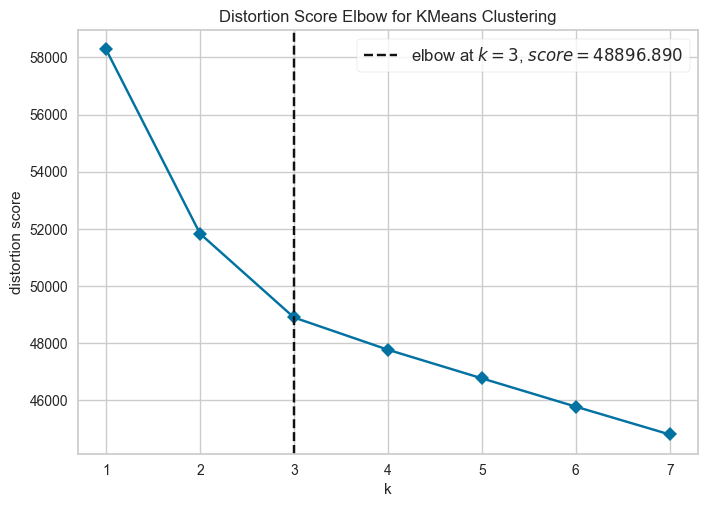

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 8), timings=False)
# fit the visualizer and show the plot
visualizer.fit(X_standardized)
visualizer.show(outpath="k_means_elbow_plot.png")